In [2]:
import numpy as np
import cv2 as cv
import scipy
import scipy.special
import scipy.spatial
import scipy.stats
import scipy.ndimage
import matplotlib
import matplotlib.patches
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.collections as mc
from matplotlib.path import Path

(-1.0, 1.0)

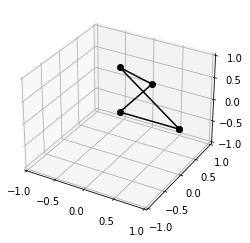

In [8]:
# 3D rotations
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

v = np.array([
    [1, 0, 0],
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
])
ax.plot(*v.T, '-ko')

r = scipy.spatial.transform.from_quat()

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])

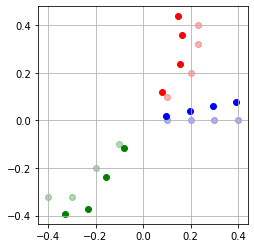

In [3]:
# 2D rotations
def rotation_2d(theta):
    """2D rotation matrix. If x is a column vector of 2D points then
    `rotation_2d(theta) @ x` gives the rotated points.
    
    Parameters
    ==========
    theta : float
        Rotates points clockwise about origin if theta is positive.
        Rotates points counter-clockwise about origin if theta is negative
    
    Returns
    =======
    np.array
        2D rotation matrix of shape (2, 2).
    """
    return np.array([
            [ np.cos(theta), np.sin(theta)],
            [-np.sin(theta), np.cos(theta)]])

v = np.array([
    [0.1,0],
    [0.2,0],
    [0.3,0],
    [0.4,0],
])

w = np.array([
    [0.1,0.1],
    [0.2,0.2],
    [0.23,0.32],
    [0.233,0.4],
])

x = np.array([
    [-0.1,-0.1],
    [-0.2,-0.2],
    [-0.3,-0.32],
    [-0.4,-0.32],
])

fig, ax = plt.subplots()
ax.scatter(v[:,0],v[:,1], color="blue", alpha=0.3)
ax.scatter(w[:,0],w[:,1], color="red", alpha=0.3)
ax.scatter(x[:,0],x[:,1], color="green", alpha=0.3)

theta = -0.2
mtx = rotation_2d(theta)

vp = v @ mtx.T
wp = w @ mtx.T
xp = x @ mtx.T
ax.scatter(vp[:,0],vp[:,1], color="blue")
ax.scatter(wp[:,0],wp[:,1], color="red")
ax.scatter(xp[:,0],xp[:,1], color="green")

ax.grid()
ax.set_aspect('equal')


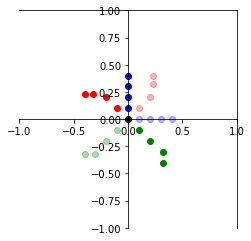

In [4]:
# rotate multiple vectors at once by creating a transformation matrix.
# transformation matrix is generated from a rotation vector.
R = scipy.spatial.transform.Rotation

# rotate (T,2) trajectories

v = np.array([
    [0.1,0],
    [0.2,0],
    [0.3,0],
    [0.4,0],
])

w = np.array([
    [0.1,0.1],
    [0.2,0.2],
    [0.23,0.32],
    [0.233,0.4],
])

x = np.array([
    [-0.1,-0.1],
    [-0.2,-0.2],
    [-0.3,-0.32],
    [-0.4,-0.32],
])

def rotate_ccw_about_origin(v, angle):
    assert v.shape[-1] == 2
    r = R.from_rotvec(np.array([0, 0, 1]) * angle).as_matrix()
    v_shape = v.shape
    v = np.reshape(v, (-1, 2))
    v = np.pad(v, [(0,0),(0,1)])
    v = (r @ v.T).T
    v = v[:, :2]
    v = np.reshape(v, v_shape)
    return v

fig, ax = plt.subplots()
ax.scatter(0, 0, color="black")
ax.scatter(v[:,0],v[:,1], color="blue", alpha=0.3)
ax.scatter(w[:,0],w[:,1], color="red", alpha=0.3)
ax.scatter(x[:,0],x[:,1], color="green", alpha=0.3)

angle = np.pi / 2
v = rotate_ccw_about_origin(v, angle)
w = rotate_ccw_about_origin(w, angle)
x = rotate_ccw_about_origin(x, angle)

ax.scatter(v[:,0],v[:,1], color="blue")
ax.scatter(w[:,0],w[:,1], color="red")
ax.scatter(x[:,0],x[:,1], color="green")

# change graph appearance
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_aspect('equal')

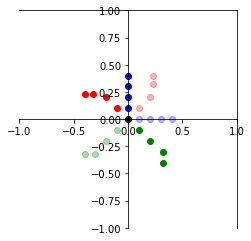

In [3]:
# rotate multiple vectors at once by creating a transformation matrix.
# transformation matrix is generated from a rotation vector.
R = scipy.spatial.transform.Rotation

# rotate (T,2) trajectories

v = np.array([
    [
        [0.1,0],
        [0.2,0],
        [0.3,0],
        [0.4,0],
    ],[
        [0.1,0.1],
        [0.2,0.2],
        [0.23,0.32],
        [0.233,0.4],
    ],[
        [-0.1,-0.1],
        [-0.2,-0.2],
        [-0.3,-0.32],
        [-0.4,-0.32],
    ]
])

def rotate_ccw_about_origin(v, angle):
    assert v.shape[-1] == 2
    # Rotation.as_matrix() equivalent Rotation.as_dcm()
    r = R.from_rotvec(np.array([0, 0, 1]) * angle).as_matrix()
    v_shape = v.shape
    v = np.reshape(v, (-1, 2))
    v = np.pad(v, [(0,0),(0,1)])
    v = (r @ v.T).T
    v = v[:, :2]
    v = np.reshape(v, v_shape)
    return v

fig, ax = plt.subplots()
ax.scatter(0, 0, color="black")
ax.scatter(v[0,:,0],v[0,:,1], color="blue", alpha=0.3)
ax.scatter(v[1,:,0],v[1,:,1], color="red", alpha=0.3)
ax.scatter(v[2,:,0],v[2,:,1], color="green", alpha=0.3)

angle = np.pi / 2
v = rotate_ccw_about_origin(v, angle)

ax.scatter(v[0,:,0],v[0,:,1], color="blue")
ax.scatter(v[1,:,0],v[1,:,1], color="red")
ax.scatter(v[2,:,0],v[2,:,1], color="green")

# change graph appearance
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_xlim(-1.0,1.0)
ax.set_ylim(-1.0,1.0)
ax.set_aspect('equal')